# NLP Project

In this project we will create a Machine Learning model to classify whether a email is spam or ham based on the contents of the email.

The dataset is in the form of an csv file. It has the following columns 
1. Unamed 0: it is a column with random numbers.
2. label: it is the column that tells whether the email is ham or spam. 
3. text: it contains the content of the email
4. label_num: numeric representation for ham and spam. 0 = ham , 1 = spam

## Importing the necssary packages

In [1]:
#Basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

#Functions needed from nltk to preprocess the data
from nltk import re
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

#Modules needed from sklearn to vectorize the data , create a model ,train it and then evaluate it
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,RocCurveDisplay,roc_auc_score

#To show all matplotlib plots on the notebook
%matplotlib inline

## Analyzing the data 

In [2]:
#Reading the dataset from csv file and storing it to a dataframe
df=pd.read_csv('spam_ham_dataset.csv')
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [3]:
#Finding count of NaN values in the dataset
df.isna().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

There are no NaN values in the dataset

In [4]:
#finding the number of ham and spam emails in the dataset
ham_count=df[df['label']=='ham']
spam_count=df[df['label']=='spam']
print("Ham email count: {} , Spam email count : {}".format(len(ham_count),len(spam_count)))

Ham email count: 3672 , Spam email count : 1499


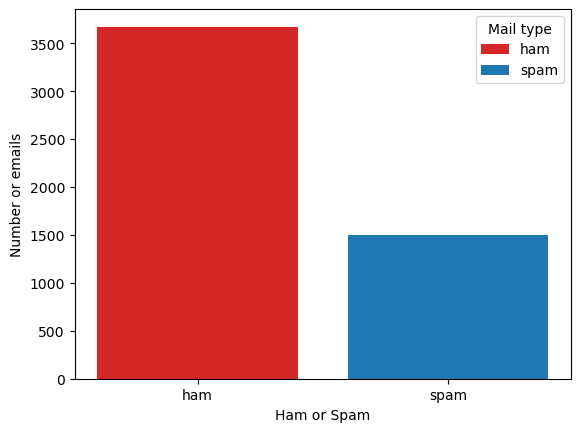

In [5]:
#Plotting a bar graph based on the number of spam and ham emails
fig , ax = plt.subplots()

x_val=['ham','spam']
y_val=[len(ham_count),len(spam_count)]

lab=['ham','spam']
bar_colors=['tab:red','tab:blue']

ax.bar(x_val,y_val,label=lab,color=bar_colors)
ax.set_ylabel('Number or emails')
ax.set_xlabel('Ham or Spam')
ax.legend(title='Mail type');

This graph shows the comparison between the number of spam and ham emails in the dataset

In [6]:
#content of an email
print(df['text'][35])

Subject: end of year clearance
item no #
description
price $
1 .
2 . 2 gb compact flash + type ii
micro
$
99
. 00
2 .
256 mb ddr ram sodimm for
notebook
$
29
. 90
3 .
compaq ps / 2
keyboard
$
9
. 50
4 .
diamond supraexpress 56 k ext . serial
data / fax / voice modem
$
23
. 90
5 .
diamond supramax 56 k usb external
modem
$
25
. 50
6 .
hp deskjet 1100 d printer
$
158
. 00
7 .
hp laserjet 1160 printer
$
278
. 00
8 .
intel play me 2 web camera
$
8
. 80
9 .
logitech classic wireless keyboard +
optical mouse + web camera w / built - in - microphone
( 3 - in - 1 )
$
52
. 00
10 .
logitech wireless optical scroll
mouse
$
16
. 90
11 .
logitech io personal digital pen
$
107
. 50
12 .
notebookplus usb mini webcam
$
15
. 90
13 .
notebookplus mobile mini usb keypad +
calculator ( 2 - in - 1 )
$
49
. 00
14 .
oem 4 port usb 2 . 0 mini hub no power
required
$
5
. 50
15 .
optorite 8 x + / - dvd - rewriter
$
49
. 00
16 .
olympus trip - md 3 focus free
camera
$
19
. 50
17 .
oem pcmcia 5 in 1 memory card
r

In [7]:
#Finding the lentgh of each ham and spam emails seperately
ham_length=[len(i) for i in df[df['label']=='ham']['text']]
spam_length=[len(i) for i in df[df['label']=='spam']['text']]

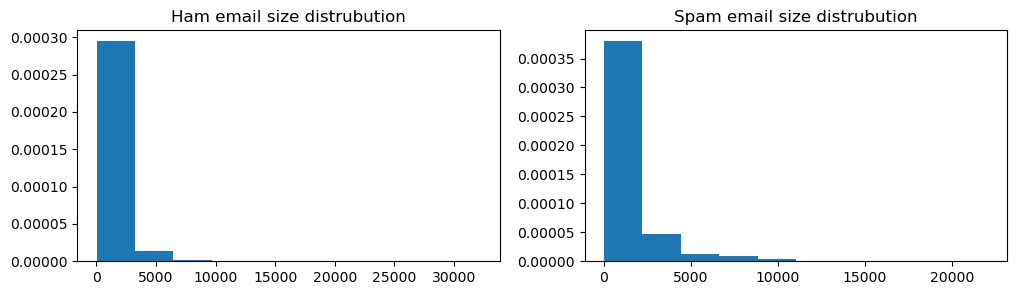

In [8]:
#Plotting a histogram to see the distrubution of email length
fig , ax = plt.subplots(1,2,figsize=(12,3))

ax[0].hist(ham_length,10,density=True)
ax[0].set_title('Ham email size distrubution')

ax[1].hist(spam_length,10,density=True)
ax[1].set_title('Spam email size distrubution');

In [9]:
#Finding the number of non-numeric characters for each ham and spam emails seperately
ham_noncharacter_count=[len(re.findall("[^\s[a-zA-Z_]",i)) for i in df[df['label']=='ham']['text']]
spam_noncharacter_count=[len(re.findall("[^\s[a-zA-Z_]",i)) for i in df[df['label']=='spam']['text']]

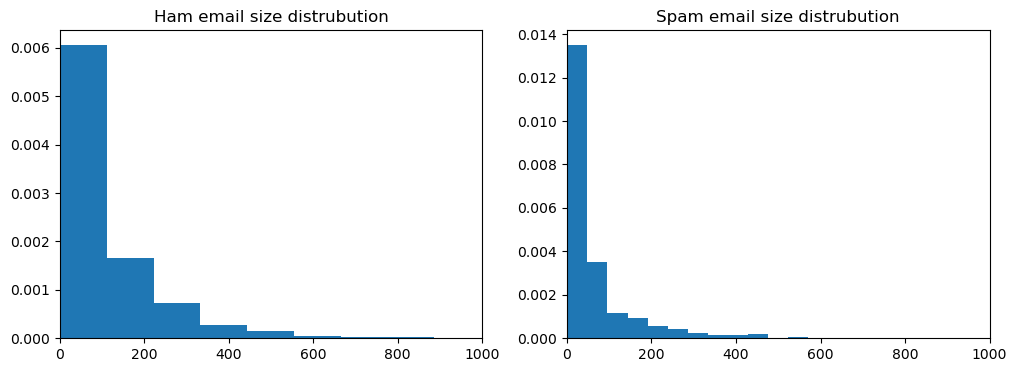

In [10]:
#Plotting a histogram to see the distrubution of number of non-numeric characters for each ham and spam emails 
fig , ax = plt.subplots(1,2,figsize=(12,4))
ax[0].hist(ham_noncharacter_count,50,density=True)
ax[0].set_title('Ham email size distrubution')
ax[0].set_xlim(0,1000)
ax[1].hist(spam_noncharacter_count,50,density=True)
ax[1].set_xlim(0,1000)
ax[1].set_title('Spam email size distrubution');

## Preprocessing the data

In [11]:
def preprocess_text(input_text):
    """This function takes a text as input and returns a text where stopwords and punctuations have been removed. The returned
       string has been lemmetized.
    """
    tokenizer = RegexpTokenizer(r"\w+")
    wnl = WordNetLemmatizer()
    tokenized_words = tokenizer.tokenize(input_text)
    st_words = list(set(stopwords.words('english')))
    new_text = [i.lower() for i in tokenized_words if i.lower() not in st_words]
    new_text = [wnl.lemmatize(i) for i in new_text]
    new_text = ' '.join(new_text)
    return new_text

In [13]:
#Applying the preprocessing function to each row in the text column
df['text'] = df['text'].apply(preprocess_text)
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,subject enron methanol meter 988291 follow not...,0
1,2349,ham,subject hpl nom january 9 2001 see attached fi...,0
2,3624,ham,subject neon retreat ho ho ho around wonderful...,0
3,4685,spam,subject photoshop window office cheap main tre...,1
4,2030,ham,subject indian spring deal book teco pvr reven...,0


In [14]:
#Creating a TF-IDF vector from the text and then splitting the data into test and train.
vectorizer = TfidfVectorizer()

X = df['text']
X_tfid = vectorizer.fit_transform(X)
y = df['label_num']

X_train , X_test , y_train , y_test = train_test_split(X_tfid,y,test_size=0.2,random_state=42)

## Training and Evaluating the model

In [15]:
#Training the model and evaluating it

clf = RandomForestClassifier(max_features='log2',random_state=42)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       742
           1       0.99      0.95      0.97       293

    accuracy                           0.98      1035
   macro avg       0.99      0.97      0.98      1035
weighted avg       0.98      0.98      0.98      1035



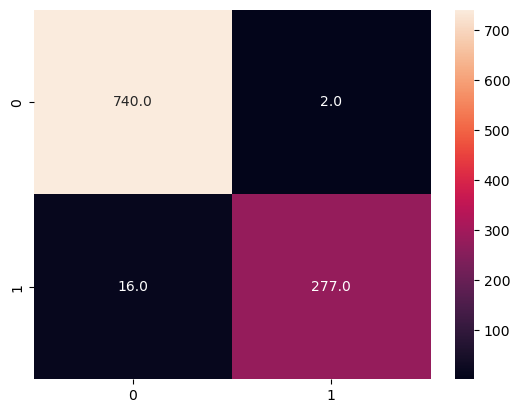

In [16]:
#Plotting a confusion matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt=".1f");

Area under the ROC Curve is 0.9713485368389096


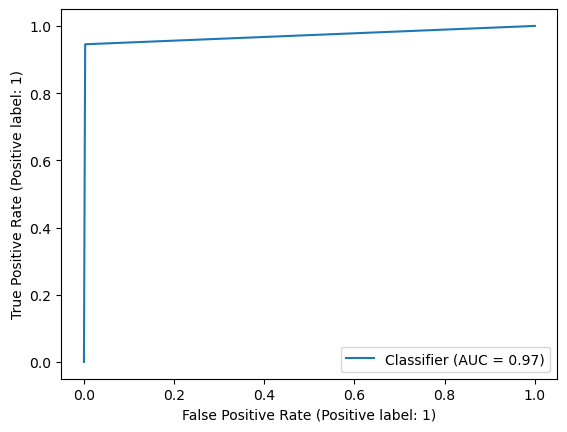

In [17]:
#plotting the ROC Curve and find the area under the curve
RocCurveDisplay.from_predictions(y_test,y_pred)
print("Area under the ROC Curve is {}".format(roc_auc_score(y_test,y_pred)));